In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv("Dataset .csv")

## RESTAURANTS RATINGS

In [58]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [60]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [61]:
df.dropna(inplace=True)
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [62]:
df.shape

(9542, 21)

In [63]:
df.duplicated().sum()

np.int64(0)

## TOP THREE CUISINES

In [64]:
cuisine_data=df["Cuisines"]

In [65]:
cuisine_data

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9542, dtype: object

In [66]:
cuisine_counts = cuisine_data.value_counts()

In [67]:
cuisine_counts

Cuisines
North Indian                          936
North Indian, Chinese                 511
Chinese                               354
Fast Food                             354
North Indian, Mughlai                 334
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, B�_rek                        1
Restaurant Cafe, Turkish, Desserts      1
Restaurant Cafe, Desserts               1
Name: count, Length: 1825, dtype: int64

In [68]:
top_cuisines = cuisine_counts.head(3)


In [69]:
top_cuisines

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

In [70]:
total_restraunts=len(df)
percentage = (top_cuisines/total_restraunts)*100

In [71]:
total_restraunts

9542

In [72]:
percentage

Cuisines
North Indian             9.809264
North Indian, Chinese    5.355271
Chinese                  3.709914
Name: count, dtype: float64

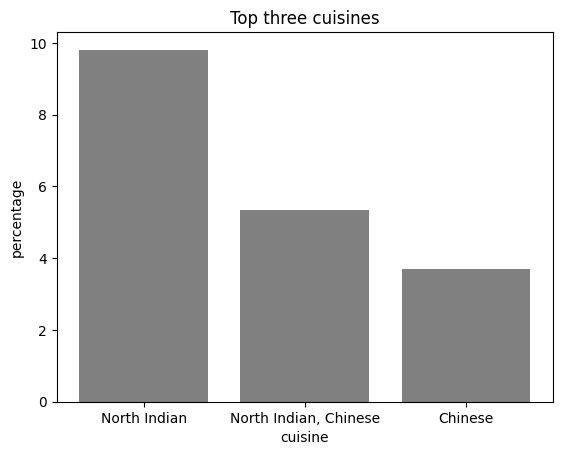

In [73]:
plt.bar(percentage.index,percentage.values,color="grey")
plt.xlabel("cuisine")
plt.ylabel("percentage")
plt.title("Top three cuisines")
plt.show()

## CITY ANALYSIS

In [74]:
restraunt_count = df.groupby("City")["Restaurant ID"].count()
City_with_max_restraunts = restraunt_count.idxmax()

In [75]:
restraunt_count

City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             17
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
��stanbul          14
Name: Restaurant ID, Length: 140, dtype: int64

In [76]:
print("City with max number of restraunt is",City_with_max_restraunts)

City with max number of restraunt is New Delhi


In [77]:
average_rating=df.groupby("City")["Aggregate rating"].mean()

In [78]:
average_rating

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64

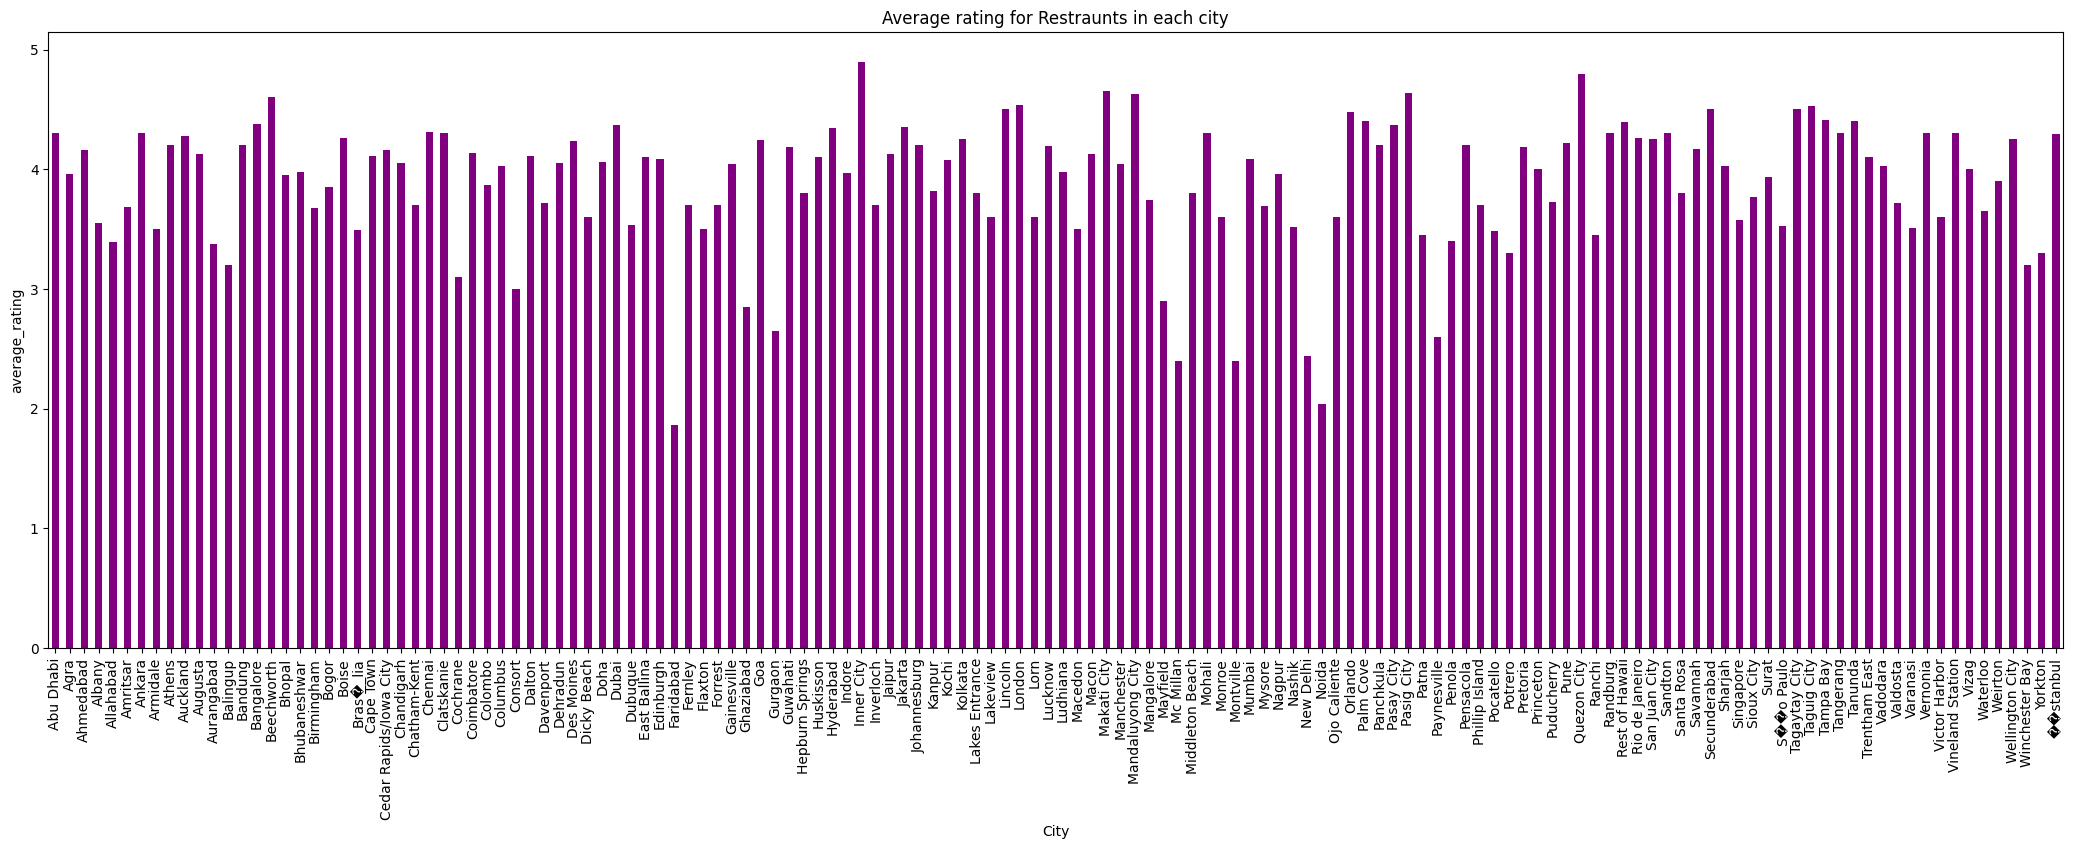

In [79]:
average_rating.plot(kind="bar" ,figsize=(26,8),color="purple")
plt.xlabel("City")
plt.ylabel("average_rating")
plt.title("Average rating for Restraunts in each city")
plt.show()

In [80]:
city_with_highest_average_rating =average_rating.idxmax()
print("City with highest average rating is",city_with_highest_average_rating)

City with highest average rating is Inner City


## PRICE RANGE DISTRIBUTION

In [81]:
price_range_counts = df["Price range"].value_counts().sort_index()

In [82]:
price_range_counts

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64

In [83]:
total_restraunts= len(df)

In [84]:
total_restraunts

9542

In [85]:
percntage_per_price_range = (price_range_counts/total_restraunts)*100

In [86]:
percntage_per_price_range

Price range
1    46.510166
2    32.624188
3    14.724376
4     6.141270
Name: count, dtype: float64

In [87]:
print("Percentage of restraunts per price range",percntage_per_price_range)

Percentage of restraunts per price range Price range
1    46.510166
2    32.624188
3    14.724376
4     6.141270
Name: count, dtype: float64


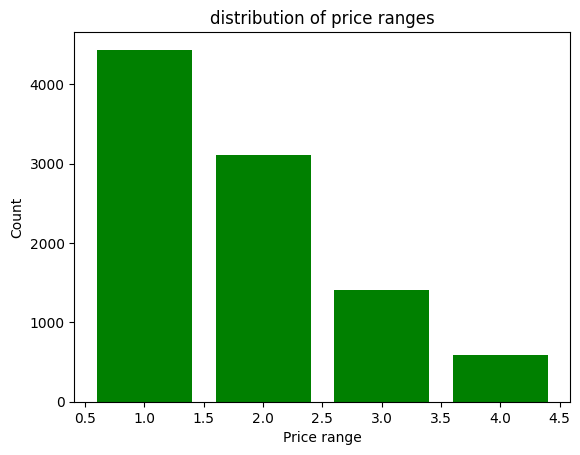

In [88]:
plt.bar(price_range_counts.index,price_range_counts.values,color="green")
plt.ylabel("Count")
plt.xlabel("Price range")
plt.title("distribution of price ranges")
plt.show()

## ONLINE DELIVERY

In [89]:
total_restraunts=len(df)
restraunts_with_online_delivery = df["Has Online delivery"].value_counts().get("Yes",0)
percentage_with_online_delivery = (restraunts_with_online_delivery/total_restraunts)*100

In [90]:
total_restraunts

9542

In [91]:
restraunts_with_online_delivery

np.int64(2451)

In [92]:
print("Percentage of restraunts offer online delivery: ",percentage_with_online_delivery)

Percentage of restraunts offer online delivery:  25.686438901697755


In [93]:
average_rating_with_online_delivery = df[df["Has Online delivery"] == "Yes"]["Aggregate rating"].mean()
average_rating_without_online_delivery = df[df["Has Online delivery"] == "No"]["Aggregate rating"].mean()

In [94]:
print("Average rating of restraunts with online delivery: ",average_rating_with_online_delivery)
print("Average rating of restraunts without online delivery: ",average_rating_without_online_delivery )

Average rating of restraunts with online delivery:  3.2488372093023257
Average rating of restraunts without online delivery:  2.4635171343957127


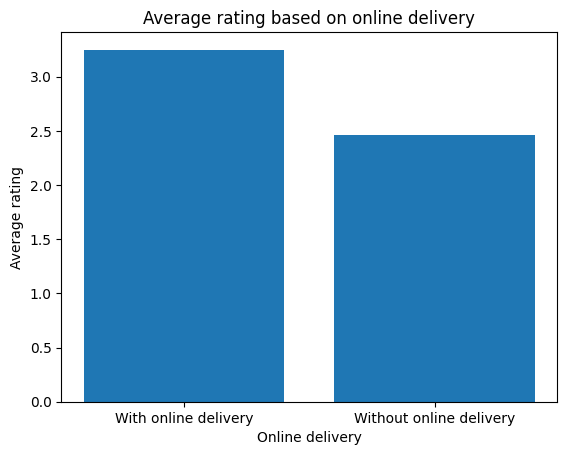

In [95]:
labels= ["With online delivery" , "Without online delivery"]
average_ratings = [average_rating_with_online_delivery , average_rating_without_online_delivery]


plt.bar(labels,average_ratings)
plt.ylabel("Average rating")
plt.xlabel("Online delivery")
plt.title("Average rating based on online delivery")
plt.show()